## Model Evaluation 

#### Crossvalidation: create pipeline to preprocess data, train model, and evaluate it using crossvalidation

In [499]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# load data
digits = datasets.load_digits()
features = digits.data
targets = digits.target

# split training and testing data
features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size=0.1, random_state=1)

# create stardardizer
standardizer = StandardScaler()

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# create model
model = LogisticRegression()

# create k-Fols cross-validation
kf = KFold(n_splits =10, shuffle = True, random_state =420)

# create pipeline
pipeline = make_pipeline(standardizer, model)


# make crossvalidation
cv_results = cross_val_score(pipeline,
                            features, 
                            targets,
                            cv = kf, 
                            scoring = 'accuracy',
                            n_jobs =-1 ) # use all CPU


#### Create a baseline regression model to compare model with using DummyRegressor for regression

In [501]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load data
boston = load_boston()
features = boston.data
target = boston.target

# split training and testing data
features_train, features_test, target_train, target_test = \
    train_test_split(features, target, random_state = 420)
    
# create dummy regressor, fit and get R-square score
dummy = DummyRegressor(strategy = 'mean')
dummy.fit(features_train, target_train)
dummy_score = dummy.score(features_test, target_test)

# create model, fit and get R-square score
lin_reg = LinearRegression().fit(features_train, target_train)
lin_reg_score = lin_reg.score(features_test, target_test)

print('dummy R2 : ', dummy_score)
print('lin reg R2:', lin_reg_score)

# note: the more R-squared is close to 1, the more variacne is 
# explained by features

dummy R2 :  -0.0005163354383890262
lin reg R2: 0.8075265103858612


#### Create a baseline regression model to compare model with using DummyClassifier for classification

In [509]:
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# load data
iris = datasets.load_iris()
features = iris.data
targets= iris.target

# split train test set
features_train, features_test, targets_train, targets_test = \
train_test_split(features, targets, random_state =420)

# create dummy classifier
dummy = DummyClassifier(strategy = 'uniform', random_state =420) 
dummy.fit(features_train, targets_train)
dummy_score = dummy.score(features_test, targets_test)

# create model
random_forest = RandomForestClassifier().fit(
    features_train, targets_train)
random_forest_score = random_forest.score(features_test, targets_test)

# print
print('dummy R2 : ', dummy_score)
print('random forest R2:', random_forest_score)


dummy R2 :  0.34210526315789475
random forest R2: 1.0


#### Using accuracy with cross_val_score for binary classes

In [513]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate features mat and target
features, targets = make_classification(n_samples =10000,
                                       n_features = 3,
                                       n_informative =3,
                                       n_redundant =0,
                                       n_classes =2,
                                       random_state = 420)
# create model
model = LogisticRegression()

# measure model accuracy: (TP + TN) / (TP+TN+FP+FN)
cross_val_score(model, features, targets, scoring='accuracy')
# measure precision: TP/ (TP+FP)
cross_val_score(model, features, targets, scoring='precision')
# measure recall: TP / (TP+FN)
cross_val_score(model, features, targets, scoring='recall')
# measure f1: 2 x (precision x recall) / (precision + recall)
# balance between recall and precision
cross_val_score(model, features, targets, scoring='f1')

array([0.94612795, 0.95862069, 0.93952484, 0.93167028, 0.94086022])

#### Using accuracy with training and testing set

In [514]:
# with train ing and testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create train test ds
features_train, features_test, targets_train, targets_test = \
    train_test_split(features, targets, test_size = 0.1,
                     random_state = 420)

# predict values
model = LogisticRegression().fit(features_train, targets_train)
predictions = model.predict(features_test)

# get score
accuracy_score(targets_test, predictions)


0.902

#### Evaluating Multiclass Classifier Predictions for 3+ classes using cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate data
features, targets = make_classification(n_samples = 10000,
                                       n_classes = 3, 
                                       n_informative = 3,
                                       n_redundant = 0,
                                       random_state = 420)

# create model
model = LogisticRegression()

# Cross-validate model using macro averaged F1 score
cross_val_score(model, features, targets, scoring='f1_macro')
cross_val_score(model, features, targets, scoring='f1_micro')
cross_val_score(model, features, targets, scoring='f1_weighted')

#### Using Roc and AUC

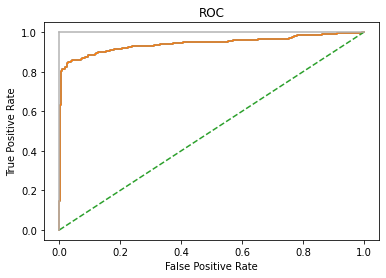

Threshold: 0.07194459250677938
True Positive Rate: 0.9644268774703557
False Positive Rate: 0.6538461538461539


0.9425037205357574

In [532]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# generate data
features, targets = make_classification (n_samples = 10000,
                                        n_features =10,
                                        n_classes = 2,
                                        n_informative = 3,
                                        random_state = 420)

# split data into train and test set
features_train, features_test, targets_train, targets_test =\
    train_test_split(features, targets, test_size =0.1, 
                     random_state =420)

# make model
model = LogisticRegression().fit(features_train , targets_train)

# predict probabilities
predictions_prob = model.predict_proba(features_test)[:,1]

# create roc
false_positive_rate, true_positive_rate, threshold = \
    roc_curve(targets_test, predictions_prob)

# plot ROC curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# view tradeoff
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

# calculate auc
roc_auc_score(targets_test, predictions_prob)

# roc show bias variance tradeoff

#### VIsualize Classifier Performance with Confusion Matrix 

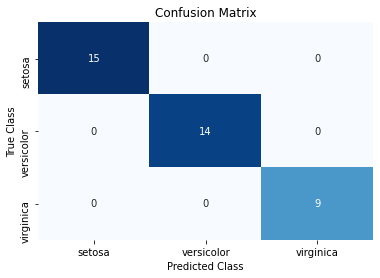

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# load data
iris = load_iris()
features = iris.data
targets = iris.target

# get target classes names
target_class_names = iris.target_names

# split train and test set
features_train, features_test, targets_train, targets_test = \
    train_test_split(features, targets, random_state = 420)

# Create model
classifier = LogisticRegression().fit(features_train, targets_train)

# get predictions
predictions = classifier.predict(features_test)

# create confusion matrix
confusion_mat = confusion_matrix(targets_test, predictions)
confusion_mat = pd.DataFrame(confusion_mat,
                             index = target_class_names,
                            columns = target_class_names)

# plot confusion matrix as heat map
sns.heatmap(confusion_mat, annot=True, cbar=None, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# confusion matrices are easy to interpret and we can see what 
# classes it has difficulty to predict so we can optimize 

#### Evaluating Regression Models using MSE

In [546]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# generate values
features, targets = make_regression(n_samples = 1000,
                                   n_features = 3,
                                   n_informative = 3,
                                   random_state = 420,
                                   coef = False,
                                   noise = 50,
                                   n_targets = 1)

# make model
lin_reg = LinearRegression()

# view score
cross_val_score(lin_reg, features, targets, 
                scoring = 'neg_mean_squared_error')
cross_val_score(lin_reg, features, targets, scoring = 'r2') # rsquared



array([0.79593536, 0.83818649, 0.79793638, 0.79916458, 0.80929937])

#### Evaluating Clustering Models with silouhette_score

In [549]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate data
features, _ = make_blobs(n_samples = 1000,
                        n_features = 10,
                        centers = 2,
                        cluster_std = 0.5,
                        shuffle = True,
                        random_state =1)

# cluster data
cluster = KMeans(n_clusters =2 , random_state =420) \
    .fit(features)

# get predicted classes
target_predicted = cluster.labels_

# evaluate model 
silhouette_score(features, target_predicted)


0.8916265564072142

#### Create Custom Evaluation Metric

In [559]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# generate data
features, targets = make_regression(n_samples =1000,
                                   n_features = 3,
                                   random_state = 420)

# split into train and test
features_train, features_test, targets_train, targets_test =\
    train_test_split(features, targets, random_state = 420,
                    test_size = 0.1)


# create custom metrics
def custom_metric(target_test, target_predicted):
    # calculate r squared
    return r2_score(target_test, target_predicted)
    
# define score
cust_score = make_scorer(custom_metric, greater_is_better= True)

# create model
model = Ridge().fit(features_train, targets_train)

# make predictions
predictions = model.predict(features_test)

# apply custom score 
cust_score(model, features_test, targets_test)

0.9999987100532746

#### Visualize the Learning Curve

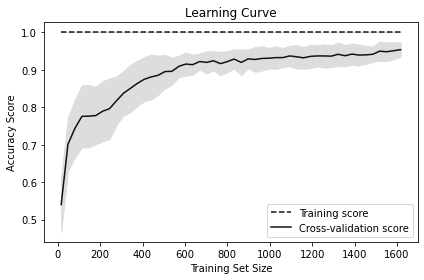

In [563]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# load data
digits = load_digits()
features =digits.data
targets = digits.target

# create learning curve
train_sizes, train_scores, test_scores = \
    learning_curve(RandomForestClassifier(),
                  features, 
                  targets, 
                  cv=10,
                  scoring = 'accuracy',
                  n_jobs = -1,
                  train_sizes=np.linspace(0.01,1.0,50))

# get mean and std
train_mean = np.mean(train_scores, axis= 1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis =1)

# create plot
plt.plot(train_sizes, train_mean, '--', color="#111111",
         label="Training score")
plt.plot(train_sizes, test_mean, color="#111111",
         label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std,
 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
 test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Create Text Report of evaluation metrics with classficiation_report

In [574]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# load data
iris = datasets.load_iris()
features = iris.data
targets= iris.target

# get target class names
target_class_names  = iris.target_names

# split into train and test
features_train, features_test, targets_train, targets_test =\
    train_test_split(features, targets, random_state = 420)

# create model
model = LogisticRegression().fit(features_train, 
                                      targets_train)

# preditc
predictions = model.predict(features_test)


# make classification report
print(classification_report(targets_test, predictions, 
                     target_names = target_class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### Visualize effect of Hyperparameter Values: understanding how model performance change with different hyperparameters


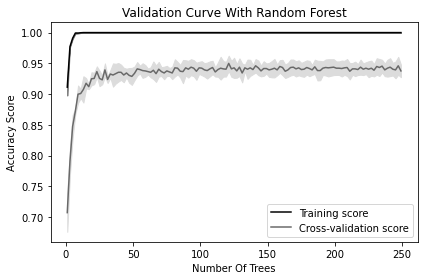

In [580]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# load data 
digits = load_digits()
features = digits.data
targets = digits.target

# create range of values for hyperparameters
param_range = np.arange(1, 250,2) # generate all values by 2

# calculate accuracy on training and test using different param
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    targets, 
    param_name = 'n_estimators',
    param_range = param_range,
    cv=3,
    scoring = 'accuracy',
    n_jobs=-1)

# Calculate mean and standard deviation 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
 test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()